# Wandb

In [ ]:
!pip install wandb

In [ ]:
!wandb login

wandb: Currently logged in as: pathekarpranav05 (pranav4175). Use `wandb login --relogin` to force relogin


In [ ]:
import wandb
import keras

In [ ]:
pip install wandb-callbacks

In [ ]:
wandb.init(project="Image Segmentaion", entity="pranav4175")

wandb: Currently logged in as: pathekarpranav05 (pranav4175). Use `wandb login --relogin` to force relogin


# ***Getting things ready***

In [ ]:
!pip install imagecodecs
# Restart the kernel
import os
#os.kill(os.getpid(), 9)

In [ ]:
import os
import random
import imagecodecs
import numpy as np
from tqdm import tqdm
import tensorflow as tf
import tifffile as tiff
import matplotlib.pyplot as plt
from keras.metrics import BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives, Precision, Recall, AUC, binary_accuracy

In [ ]:
seed = 42
np.random.seed = seed

In [ ]:
IMG_WIDTH=512
IMG_HEIGHT=512
IMG_CHANNELS=3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X_train = np.zeros((16+16, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((16+16, IMG_HEIGHT, IMG_WIDTH), dtype=np.bool_)
print(X_train.shape, Y_train.shape)

(32, 512, 512, 3) (32, 512, 512)


# X_train & Y_train

In [ ]:
import os
TRAIN_PATH = "/content/drive/MyDrive/BuildingModel/SatelliteDataPatches"
print(next(os.walk(TRAIN_PATH))[0])
print(next(os.walk(TRAIN_PATH))[1])
print(next(os.walk(TRAIN_PATH))[2])

/content/drive/MyDrive/BuildingModel/SatelliteDataPatches
['Hyde_1_Clipped_mask_patches', 'Hyde_2_Clipped_image_patches', 'Hyde_1_Clipped_image_patches', 'Hyde_2_Clipped_mask_patches']
[]


In [ ]:
X_trainFolders = []
Y_trainFolders = []
TrainFolders = next(os.walk(TRAIN_PATH))[1]
for i in TrainFolders:
  if(i.endswith('image_patches') and i.startswith('Hyd')):
    X_trainFolders.append(i)
  elif(i.endswith('mask_patches') and i.startswith('Hyd')):
    Y_trainFolders.append(i)
print(X_trainFolders,Y_trainFolders)

['Hyde_2_Clipped_image_patches', 'Hyde_1_Clipped_image_patches'] ['Hyde_1_Clipped_mask_patches', 'Hyde_2_Clipped_mask_patches']


In [ ]:
import os
path1 = '/content/drive/MyDrive/BuildingModel/SatelliteDataPatches/Hyde_1_Clipped_mask_patches/'
path2 = '/content/drive/MyDrive/BuildingModel/SatelliteDataPatches/Hyde_2_Clipped_mask_patches/'
print(os.listdir(path1))
print(os.listdir(path2))


['Hyde_1_patch_4_mask.tif', 'Hyde_1_patch_15_mask.tif', 'Hyde_1_patch_12_mask.tif', 'Hyde_1_patch_13_mask.tif', 'Hyde_1_patch_2_mask.tif', 'Hyde_1_patch_8_mask.tif', 'Hyde_1_patch_0_mask.tif', 'Hyde_1_patch_6_mask.tif', 'Hyde_1_patch_10_mask.tif', 'Hyde_1_patch_14_mask.tif', 'Hyde_1_patch_5_mask.tif', 'Hyde_1_patch_9_mask.tif', 'Hyde_1_patch_3_mask.tif', 'Hyde_1_patch_7_mask.tif', 'Hyde_1_patch_11_mask.tif', 'Hyde_1_patch_1_mask.tif']
['Hyde_2_patch_11_mask.tif', 'Hyde_2_patch_1_mask.tif', 'Hyde_2_patch_2_mask.tif', 'Hyde_2_patch_8_mask.tif', 'Hyde_2_patch_9_mask.tif', 'Hyde_2_patch_4_mask.tif', 'Hyde_2_patch_13_mask.tif', 'Hyde_2_patch_12_mask.tif', 'Hyde_2_patch_5_mask.tif', 'Hyde_2_patch_15_mask.tif', 'Hyde_2_patch_6_mask.tif', 'Hyde_2_patch_3_mask.tif', 'Hyde_2_patch_0_mask.tif', 'Hyde_2_patch_7_mask.tif', 'Hyde_2_patch_14_mask.tif', 'Hyde_2_patch_10_mask.tif']


In [ ]:
import re
x = 0
y = 0

# Create a mapping from image folders to their corresponding mask folders
folder_mapping = {folder.split('_')[1]: folder for folder in Y_trainFolders}
print(f"Folder Mapping: {folder_mapping}")

for image_folder in X_trainFolders:
    prefix = image_folder.split('_')[1]
    mask_folder = folder_mapping.get(prefix)

    if not mask_folder:
        raise ValueError(f"No corresponding mask folder found for {image_folder}")

    image_files = sorted(next(os.walk(f'{TRAIN_PATH}/{image_folder}'))[2], key=lambda x: int(re.search(r'\d+', x).group()))
    mask_files = sorted([f[:-4] + '_mask.tif' for f in image_files], key=lambda x: int(re.search(r'\d+', x[:-14]).group()))

    for image_file, mask_file in zip(image_files, mask_files):
        image_path = f'{TRAIN_PATH}/{image_folder}/{image_file}'
        mask_path = f'{TRAIN_PATH}/{mask_folder}/{mask_file}'

        print(f'Loading image: {image_path}')

        if not os.path.exists(image_path):
            print(f'Image file not found: {image_path}')
            continue

        ximg = tiff.imread(image_path)
        X_train[x] = ximg
        x += 1

        print(f'Loading mask: {mask_path}')

        if not os.path.exists(mask_path):
            print(f'Mask file not found: {mask_path}')
            continue

        ymas = tiff.imread(mask_path)
        Y_train[y] = ymas
        y += 1

Folder Mapping: {'1': 'Hyde_1_Clipped_mask_patches', '2': 'Hyde_2_Clipped_mask_patches'}
Loading image: /content/drive/MyDrive/BuildingModel/SatelliteDataPatches/Hyde_2_Clipped_image_patches/Hyde_2_patch_10.tif
Loading mask: /content/drive/MyDrive/BuildingModel/SatelliteDataPatches/Hyde_2_Clipped_mask_patches/Hyde_2_patch_10_mask.tif
Loading image: /content/drive/MyDrive/BuildingModel/SatelliteDataPatches/Hyde_2_Clipped_image_patches/Hyde_2_patch_4.tif
Loading mask: /content/drive/MyDrive/BuildingModel/SatelliteDataPatches/Hyde_2_Clipped_mask_patches/Hyde_2_patch_4_mask.tif
Loading image: /content/drive/MyDrive/BuildingModel/SatelliteDataPatches/Hyde_2_Clipped_image_patches/Hyde_2_patch_1.tif
Loading mask: /content/drive/MyDrive/BuildingModel/SatelliteDataPatches/Hyde_2_Clipped_mask_patches/Hyde_2_patch_1_mask.tif
Loading image: /content/drive/MyDrive/BuildingModel/SatelliteDataPatches/Hyde_2_Clipped_image_patches/Hyde_2_patch_15.tif
Loading mask: /content/drive/MyDrive/BuildingModel/S

In [ ]:
print(X_train.shape,Y_train.shape,x,y)

(32, 512, 512, 3) (32, 512, 512) 32 32


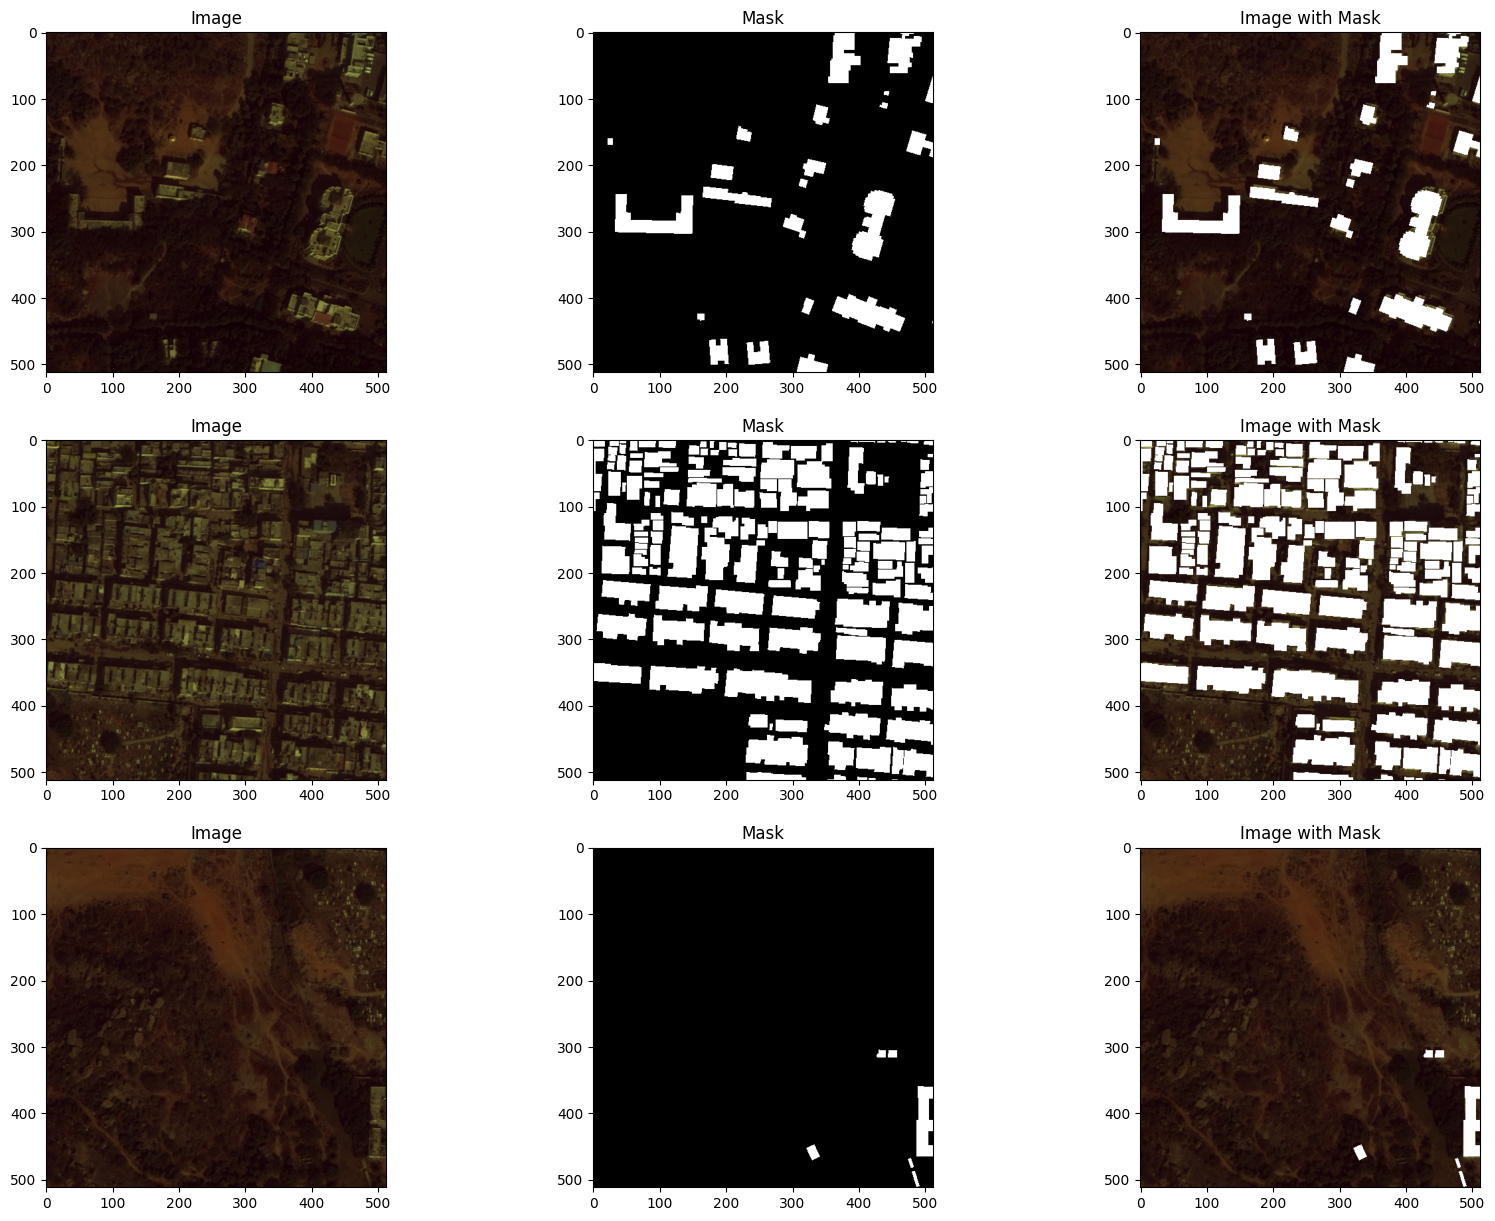

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

fig, axs = plt.subplots(3, 3, figsize=(20, 15))

for count in range(3):
    img = X_train[count]
    axs[count][0].set_title("Image")
    axs[count][0].imshow(img)

    mask = Y_train[count]
    axs[count][1].set_title("Mask")
    axs[count][1].imshow(mask, cmap='gray')


    mask = mask.astype(np.uint8)

    img_with_mask = np.copy(img)

    img_with_mask[mask == 1] = 255
    axs[count][2].set_title("Image with Mask")
    axs[count][2].imshow(img_with_mask)

plt.show()


# **Hyperparameter Tunning**

In [ ]:
'''
sweep_config = {
    'method': 'bayes',
    'metric': {
        'name': 'loss',
        'goal': 'minimize'
    },
    'parameters': {
        'optimizer': {
            'values': ['adam', 'sgd']
        },
        'learning_rate': {
            'distribution': 'log_uniform_values',
            'min': 1e-5,
            'max': 1e-2
        },
        'dropout': {
            'values': [0.4, 0.5]
        },
        'epochs': {
            'values': [50, 100]
        },
        'batch_size': {
            'value': 16
        },
        'validation_split': {
            'value': 0.1
        },
        'num_layers': {
            'values': [2, 3, 4]
        },
        'units_per_layer': {
            'values': [32, 64, 128]
        },
        'activation': {
            'values': ['relu', 'tanh']
        },
        'kernel_size': {
            'values': [3, 5]
        },
        'pool_size': {
            'values': [2, 3]
        }
    }
}
'''

In [ ]:
#Build the model

# Define input layer
input = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
# Normalize input data
s = tf.keras.layers.Lambda(lambda x: x / 255)(input)

In [ ]:
def mean_iou(y_true, y_pred):
    y_pred = tf.round(y_pred)  # Convert probabilities to binary values
    intersection = tf.reduce_sum(tf.cast(y_true * y_pred, tf.float32))
    union = tf.reduce_sum(tf.cast(y_true + y_pred, tf.float32)) - intersection
    iou = intersection / (union + tf.keras.backend.epsilon())
    return iou

# ***Model***

In [ ]:
import wandb
import tensorflow as tf

def objective(config):
    x = config['x']
    y = config['y']
    return x**3 + y

In [ ]:

def build_model(optimizer, dropout, learning_rate, num_layers, units_per_layer, activation, kernel_size, pool_size):
    inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

    # Contraction path
    c = s
    skips = []
    for i in range(num_layers):
        c = tf.keras.layers.Conv2D(units_per_layer, (kernel_size, kernel_size), activation=activation, kernel_initializer='he_normal', padding='same')(c)
        c = tf.keras.layers.Dropout(dropout)(c)
        c = tf.keras.layers.Conv2D(units_per_layer, (kernel_size, kernel_size), activation=activation, kernel_initializer='he_normal', padding='same')(c)
        skips.append(c)
        if i < num_layers - 1:  # No pooling in the last layer
            c = tf.keras.layers.MaxPooling2D((pool_size, pool_size))(c)

    # Expansive path
    for i in range(num_layers - 2, -1, -1):
        c = tf.keras.layers.Conv2DTranspose(units_per_layer, (pool_size, pool_size), strides=(pool_size, pool_size), padding='same')(c)
        c = tf.keras.layers.concatenate([c, skips[i]])
        c = tf.keras.layers.Conv2D(units_per_layer, (kernel_size, kernel_size), activation=activation, kernel_initializer='he_normal', padding='same')(c)
        c = tf.keras.layers.Dropout(dropout)(c)
        c = tf.keras.layers.Conv2D(units_per_layer, (kernel_size, kernel_size), activation=activation, kernel_initializer='he_normal', padding='same')(c)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c)

    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)


    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy', BinaryAccuracy(), FalsePositives(), FalseNegatives(), TruePositives(), TrueNegatives(), Precision(), Recall(), AUC()])

    return model

def main():
    wandb.init()
    config = wandb.config

    # Build the model
    model = build_model(
        optimizer=config.optimizer,
        dropout=config.dropout,
        learning_rate=config.learning_rate,
        num_layers=config.num_layers,
        units_per_layer=config.units_per_layer,
        activation=config.activation,
        kernel_size=config.kernel_size,
        pool_size=config.pool_size
    )

    # Assume X_train and Y_train are defined
    results = model.fit(
        X_train, Y_train,
        validation_split=config.validation_split,
        batch_size=config.batch_size,
        epochs=config.epochs,
        shuffle=True,
        verbose=1
    )

    wandb.log(results.history)

# Start the sweep
sweep_id = wandb.sweep(sweep_config, project="Runs")
wandb.agent(sweep_id, function=main, count=10)


AttributeError: <class 'wandb.sdk.wandb_config.Config'> object has no attribute 'optimizer'

# ***Training***

In [ ]:
import matplotlib.pyplot as plt

def plot_accu_vs_loss(results):
  # Create a figure and subplots
  fig, axs = plt.subplots(1, 2, figsize=(12, 6))

  # Plot training accuracy and loss
  axs[0].plot(results.history['accuracy'], label='Training Accuracy')
  axs[0].plot(results.history['val_accuracy'], label='Validation Accuracy')
  axs[0].set_title('Training Metrics')
  axs[0].set_xlabel('Epoch')
  axs[0].set_ylabel('Value')
  axs[0].legend()
  # axs[0].set_xlim(0, 100)

  # Plot validation accuracy and loss
  axs[1].plot(results.history['loss'], label='Training loss')
  axs[1].plot(results.history['val_loss'], label='Validation Loss')
  axs[1].set_title('Validation Metrics')
  axs[1].set_xlabel('Epoch')
  axs[1].set_ylabel('Value')
  axs[1].legend()
  # axs[1].set_xlim(0, 100)


  # Adjust layout
  plt.tight_layout()
  plt.show()


In [ ]:
import matplotlib.pyplot as plt

def plot_train_vs_val(results):
  # Create a figure and subplots
  fig, axs = plt.subplots(1, 2, figsize=(12, 6))

  # Plot training accuracy and loss
  axs[0].plot(results.history['accuracy'], label='Training Accuracy')
  axs[0].plot(results.history['loss'], label='Training Loss')
  axs[0].set_title('Training Metrics')
  axs[0].set_xlabel('Epoch')
  axs[0].set_ylabel('Value')
  axs[0].legend()
  # axs[0].set_xlim(0, 100)

  # Plot validation accuracy and loss
  axs[1].plot(results.history['val_accuracy'], label='Validation Accuracy')
  axs[1].plot(results.history['val_loss'], label='Validation Loss')
  axs[1].set_title('Validation Metrics')
  axs[1].set_xlabel('Epoch')
  axs[1].set_ylabel('Value')
  axs[1].legend()
  # axs[1].set_xlim(0, 100)


  # Adjust layout
  plt.tight_layout()
  plt.show()


In [ ]:
plot_train_vs_val(results)

In [ ]:
plot_accu_vs_loss(results)

***Training***

In [ ]:
################################
import wandb
import keras
from wandb.keras import WandbCallback

# ModelCheckpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint(
    '/content/drive/MyDrive/Hyperparameter_tunning.keras', verbose=1
)

callbacks = [WandbCallback(), checkpointer]
# tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss'),
# tf.keras.callbacks.TensorBoard(log_dir='logs')

####################################

# ***Prediction***

In [ ]:
X_test = X_train

In [ ]:
idx = random.randint(0, len(X_train))


preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)


preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

***Train Prediction***

In [ ]:
import matplotlib.pyplot as plt
def grid(X_train, Y_train, preds_train_t, i):
  fig, axes = plt.subplots(1, 3, figsize=(12, 4))

  axes[0].imshow(X_train[i])
  axes[0].set_title('X_train')
  axes[0].axis('off')


  axes[1].imshow(np.squeeze(Y_train[i]))
  axes[1].set_title('Y_train')
  axes[1].axis('off')

  axes[2].imshow(np.squeeze(preds_train_t[i]))
  axes[2].set_title('Predicted')
  axes[2].axis('off') \

  plt.show()


In [ ]:
for i in range(0,10):
  grid(X_train, Y_train, preds_train_t, i)


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

def calculate_confusion_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true.flatten(), y_pred.flatten()).ravel()
    return tp, fp, tn, fn

def calculate_metrics(tp, fp, tn, fn):
    precision = tp / (tp + fp + 1e-10)
    recall = tp / (tp + fn + 1e-10)
    return precision, recall

def evaluate_confusion_metrics(pred_masks, true_masks):
    tps, fps, _, fns = [], [], [], []
    for pred_mask, true_mask in zip(pred_masks, true_masks):
        tp, fp, _, fn = calculate_confusion_metrics(true_mask, pred_mask)
        tps.append(tp)
        fps.append(fp)
        fns.append(fn)
    return tps, fps, fns


preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

# confusion metrics for training set
tps_train, fps_train, fns_train = evaluate_confusion_metrics(preds_train_t, Y_train)

# confusion metrics for validation set
tps_val, fps_val, fns_val = evaluate_confusion_metrics(preds_val_t, Y_train)

# confusion metrics for test set
tps_test, fps_test, fns_test = evaluate_confusion_metrics(preds_test_t, Y_train)

# Compute overall metrics
precision_train, recall_train = calculate_metrics(sum(tps_train), sum(fps_train), 0, sum(fns_train))
precision_val, recall_val = calculate_metrics(sum(tps_val), sum(fps_val), 0, sum(fns_val))
precision_test, recall_test = calculate_metrics(sum(tps_test), sum(fps_test), 0, sum(fns_test))

print("Training Set:")
print("Precision:", precision_train)
print("Recall:", recall_train)

print("\nValidation Set:")
print("Precision:", precision_val)
print("Recall:", recall_val)

print("\nTest Set:")
print("Precision:", precision_test)
print("Recall:", recall_test)

print("\nTraining Set:")
print("True Positives:", sum(tps_train))
print("False Positives:", sum(fps_train))
print("False Negatives:", sum(fns_train))

print("\nValidation Set:")
print("True Positives:", sum(tps_val))
print("False Positives:", sum(fps_val))
print("False Negatives:", sum(fns_val))

print("\nTest Set:")
print("True Positives:", sum(tps_test))
print("False Positives:", sum(fps_test))
print("False Negatives:", sum(fns_test))


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [ ]:

def grid(X_train, Y_train, preds_train_t, i):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    axes[0].imshow(X_train[i])
    axes[0].set_title('X_train')
    axes[0].axis('off')


    axes[1].imshow(np.squeeze(Y_train[i]))
    axes[1].set_title('Y_train')
    axes[1].axis('off')


    axes[2].imshow(np.squeeze(preds_train_t[i]))
    axes[2].set_title('Predicted')
    axes[2].axis('off')


    ground_truth = np.squeeze(Y_train[i]).flatten()
    predicted_labels = np.squeeze(preds_train_t[i]).flatten()


    conf_matrix = confusion_matrix(ground_truth, predicted_labels)


    plt.figure()
    plt.imshow(conf_matrix, cmap='Blues')
    plt.colorbar()
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [ ]:
grid(X_train, Y_train, preds_train_t, i)

In [ ]:
# Predict the probabilities for the test data
preds_probs_train = model.predict(X_test)

In [ ]:
import tensorflow as tf
import numpy as np

#  X_test contains test data

# Predicting the probabilities for the test data
preds_probs_train = model.predict(X_test)

# Calculateing confidence scores for each pixel using the maximum probability
confidence_scores = np.max(preds_probs_train, axis=-1)

# Print the confidence scores for the first 5 predictions
for i in range(5):
    print(f"Prediction {i+1}: {confidence_scores[i]}")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_segmentation_with_confidence(X_train, Y_train, confidence_scores):
    fig, axs = plt.subplots(3, 3, figsize=(20, 15))

    for count in range(3):
        img = X_train[count]
        axs[count][0].set_title("Image")
        axs[count][0].imshow(img)

        mask = Y_train[count]
        axs[count][1].set_title("Mask")
        axs[count][1].imshow(mask, cmap='gray')

        mask = mask.astype(np.uint8)

        img_with_mask = np.copy(img)

        img_with_mask[mask == 1] = 255
        axs[count][2].set_title("Image with Mask and Confidence")
        axs[count][2].imshow(img_with_mask)


        axs[count][2].imshow(confidence_scores[count], cmap='coolwarm', alpha=0.5)
        axs[count][2].imshow(mask, cmap='gray', alpha=0.2)

    plt.show()


visualize_segmentation_with_confidence(X_train, Y_train, confidence_scores)
